# Explore here

### Paso 1: Planteamiento del problema y recopilación de datos

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

In [237]:
total_data = pd.read_csv("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/data/raw/bank-marketing-campaign-data.csv", sep = ";")

total_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

### Paso 2: Exploración y limpieza de datos

In [238]:
total_data.shape

(41188, 21)

In [239]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [240]:
total_data.duplicated().sum()

np.int64(12)

In [241]:
total_data = total_data.drop_duplicates(subset = total_data.columns)

columnas 6 y 7 se pueden unir --> tiene prestamo
month se puede eliminar
day_of_Week se puede eliminar


#### Eliminar información irrelevante

In [242]:
total_data.drop(["month", "day_of_week"], axis = 1, inplace = True)
total_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0       261         1    999         0  nonexistent           1.1   
1       149         1    999         0  nonexistent           1.1   
2       226         1    999         0  nonexistent           1.1   
3       151         1    999         0  nonexistent           1.1   
4       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

In [243]:
import json

# Obtener valores únicos de cada columna
job = total_data["job"].unique().tolist()
marital = total_data["marital"].unique().tolist()
education = total_data["education"].unique().tolist()
default = total_data["default"].unique().tolist()
housing = total_data["housing"].unique().tolist()
loan = total_data["loan"].unique().tolist()
contact = total_data["contact"].unique().tolist()
poutcome = total_data["poutcome"].unique().tolist()

# Crear diccionarios de transformación
job_transformation_rules = {value: idx for idx, value in enumerate(job)}
marital_transformation_rules = {value: idx for idx, value in enumerate(marital)}
education_transformation_rules = {value: idx for idx, value in enumerate(education)}
default_transformation_rules = {value: idx for idx, value in enumerate(default)}
housing_transformation_rules = {value: idx for idx, value in enumerate(housing)}
loan_transformation_rules = {value: idx for idx, value in enumerate(loan)}
contact_transformation_rules = {value: idx for idx, value in enumerate(contact)}
poutcome_transformation_rules = {value: idx for idx, value in enumerate(poutcome)}

# Guardar en archivos JSON
with open("job_transformation_rules.json", "w") as f:
    json.dump(job_transformation_rules, f)

with open("marital_transformation_rules.json", "w") as f:
    json.dump(marital_transformation_rules, f)

with open("education_transformation_rules.json", "w") as f:
    json.dump(education_transformation_rules, f)

with open("default_transformation_rules.json", "w") as f:
    json.dump(default_transformation_rules, f)

with open("housing_transformation_rules.json", "w") as f:
    json.dump(housing_transformation_rules, f)

with open("loan_transformation_rules.json", "w") as f:
    json.dump(loan_transformation_rules, f)

with open("contact_transformation_rules.json", "w") as f:
    json.dump(contact_transformation_rules, f)

with open("poutcome_transformation_rules.json", "w") as f:
    json.dump(poutcome_transformation_rules, f)

/var/folders/72/kf09dnsd1wb18f08628cdsxm0000gn/T/ipykernel_82431/3332696750.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/var/folders/72/kf09dnsd1wb18f08628cdsxm0000gn/T/ipykernel_82431/3332696750.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


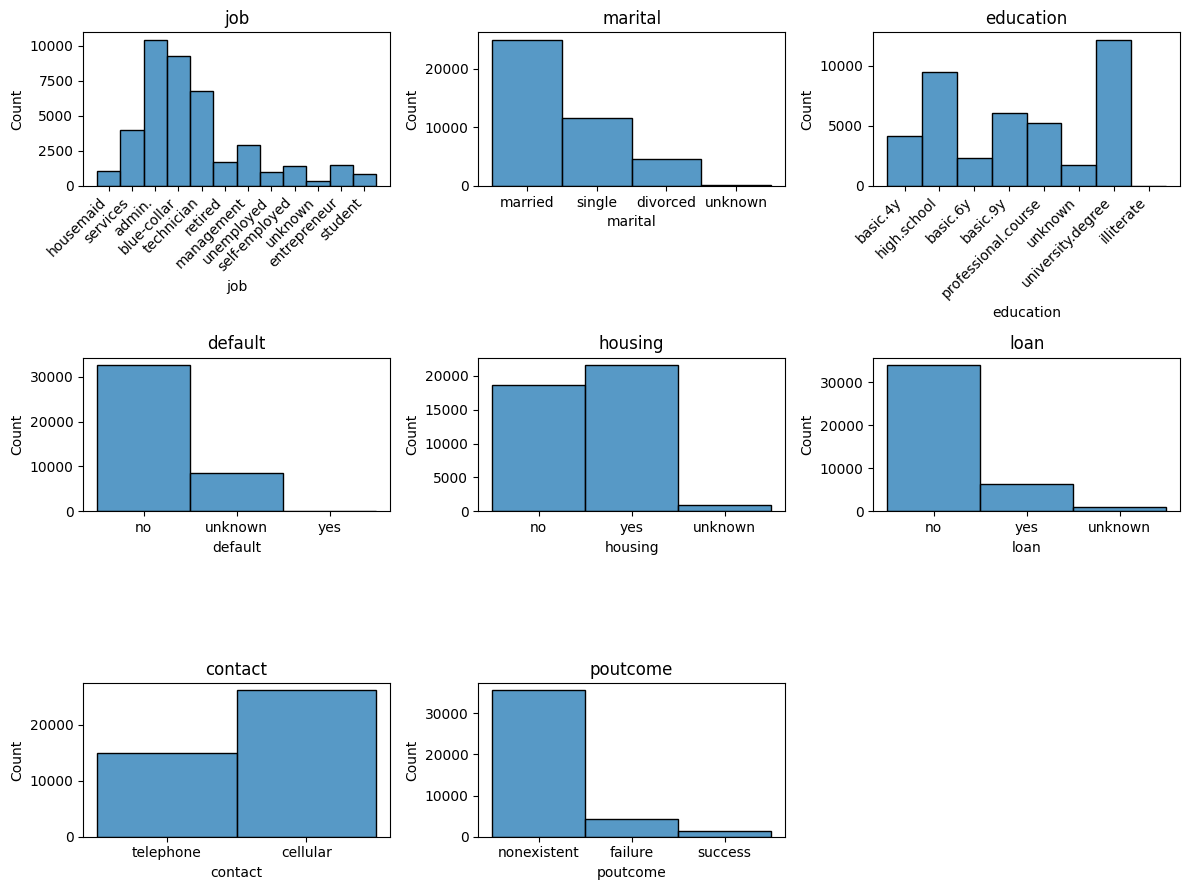

In [244]:
# Lista de columnas categóricas
categorical_variables = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"]

# Definir número de columnas y calcular el número de filas necesarias
num_cols = 3
num_rows = math.ceil(len(categorical_variables) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

# Asegurar que axes sea siempre una matriz bidimensional
axes = axes.reshape(num_rows, num_cols) if num_rows > 1 else [axes]

col_index = 0
for row in range(num_rows):
    for col in range(num_cols):
        if col_index < len(categorical_variables):
            ax = axes[row][col]
            column_name = categorical_variables[col_index]

            # Graficar histograma
            sns.histplot(data=total_data, x=column_name, ax=ax)

            # Contar cuántas categorías hay en la variable
            num_categories = total_data[column_name].nunique()

            # Rotar etiquetas en X solo si hay más de 4 categorías
            if num_categories > 4:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

            ax.set_title(column_name)  # Agregar título con el nombre de la columna
            col_index += 1
        else:
            fig.delaxes(axes[row][col])  # Eliminar gráfico vacío si hay menos de num_cols

plt.tight_layout()
plt.show()




- **Jobs**: La mayoría de los trabajadores son admin, blue-collar y technician.
- **Marital**: La mayoría de la gente a la que se ha llamado está casada.
- **Education**: La mayoría tienen un grado universitario, seguido de los que tienen un high school.
- **Default**: La mayoría de las personas contactadas no tienen crédito actualmente.
- **Housing**: Aproximadamente la mitad no tienen hipoteca y algo más de la mitad sí la tienen.
- **Loan**: La gran mayoría no tiene un préstamo personal.
- **Contact**: Aproximadamente el 75% de la gente fue contactada vía móvil y el resto por teléfono fijo.
- **Poutcome**: La gran mayoría de los datos de la campaña anterior no existían.

#### Análisis sobre variables numéricas

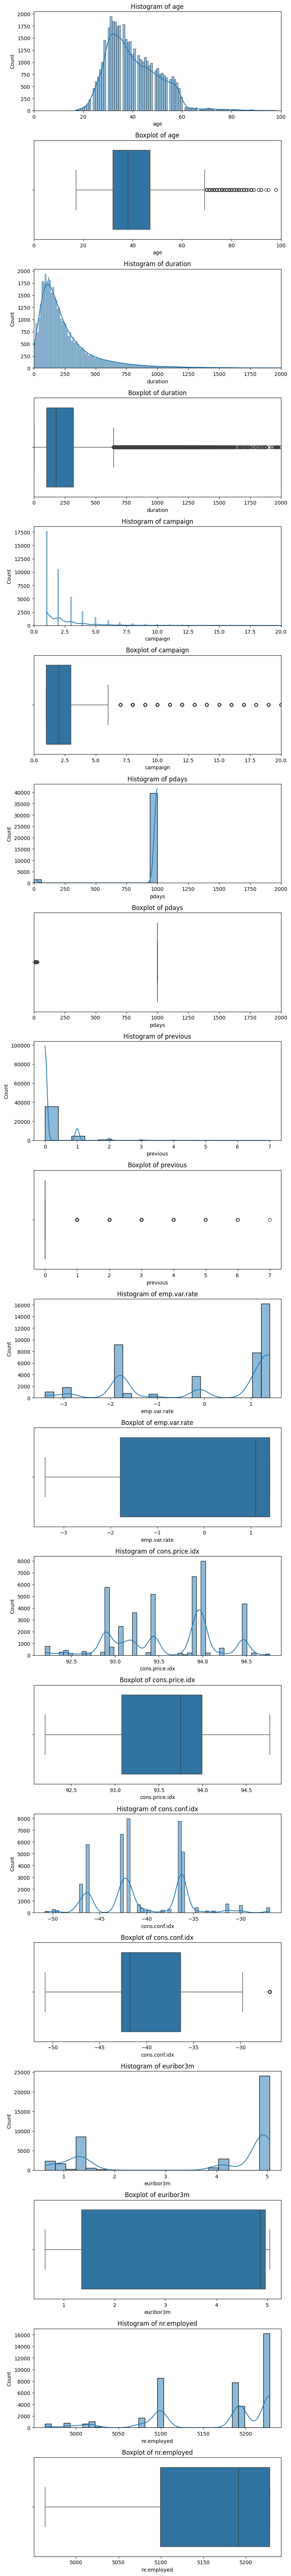

In [245]:
numericals_variables = ["age","duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

 # Crear la figura con 1 columnas y 2 filas por variable.
fig, axis = plt.subplots(len(numericals_variables) * 2, 1, figsize=(8, len(numericals_variables) * 7))
    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'duration': (0, 2000),
        'campaign': (0, 20),
        'pdays': (0, 2000),
        # Añadir más columnas y rangos si es necesario...
    }
    # Iterar sobre cada columna del DataFrame
for i, col in enumerate(numericals_variables):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = total_data, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma
        # Boxplot en la segunda fila
        sns.boxplot(data = total_data, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot
plt.tight_layout()
plt.show()

- Podemos observar como el histograma y el boxplot de "Age" muestra cierta distribución normal en el centro con una pequeña asimietría en la parte derecha.
- En pdays los datos están todos centrado entorno a los 1000.
- En previous la mayoría de los datos están en el 0 dando lugar a que el resto de datos sean anómalos en su mayoría.
- La tasa de variación del empleo muestra como la cantidad de contrataciones es mayor a la de despidos.
- El índice de precios del consumidor podemos ver que los valores se concentran entre 93 y 94 lo cual indica que la inflación se ha mantenido relativamente estable.
- El índice de confianza del consumidor esta entorno al -40, lo cual significa que hay un fuerte pesimismo en la economía.
- En el euribor vemos que la media es cercana a 5, lo que significa que los intereses han sido altos la mayor parte del tiempo con un incremento muy significativo del aproximadamente el 1.5 hasta casi el 5 %.
- El número de empleados muestra como la empresa se situa de media cerca de los 5200 empleados.

### Paso 4: Análisis de variables multivariante

#### Análisis categórico-categórico

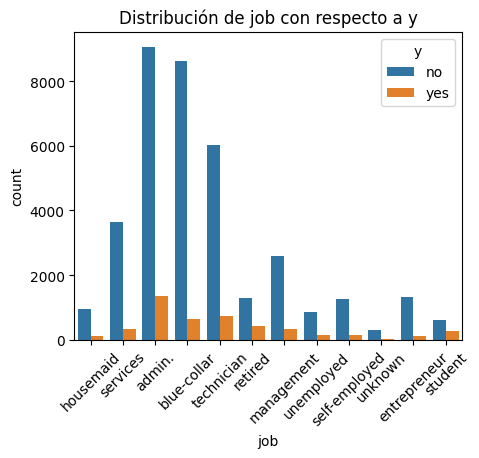

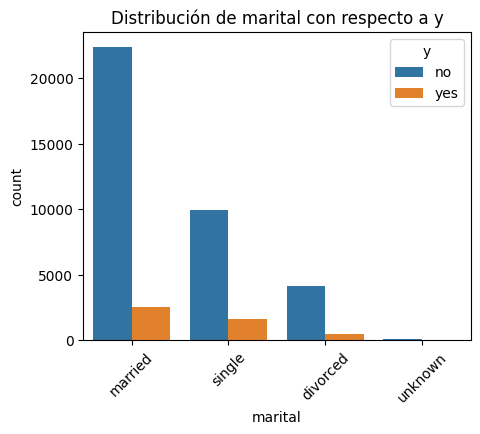

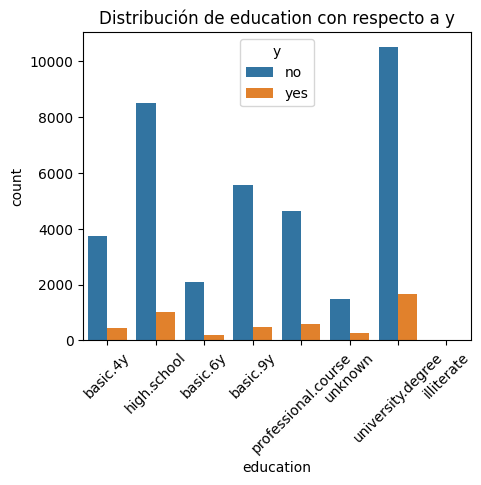

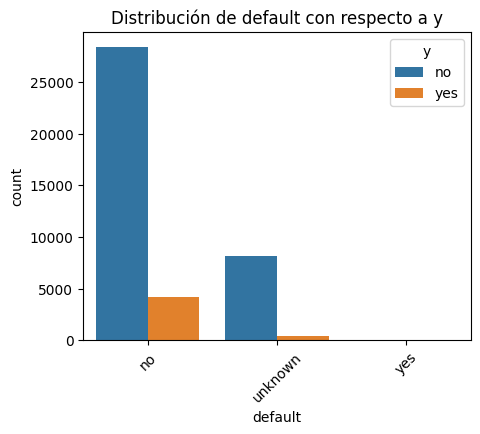

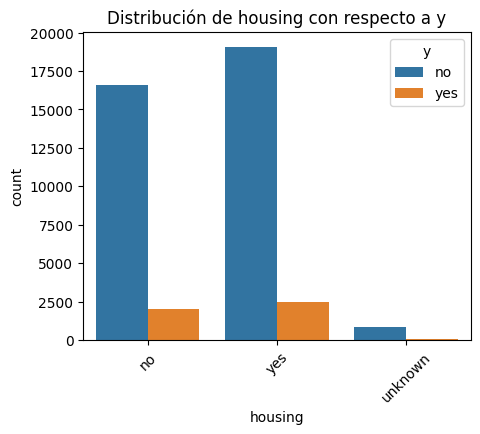

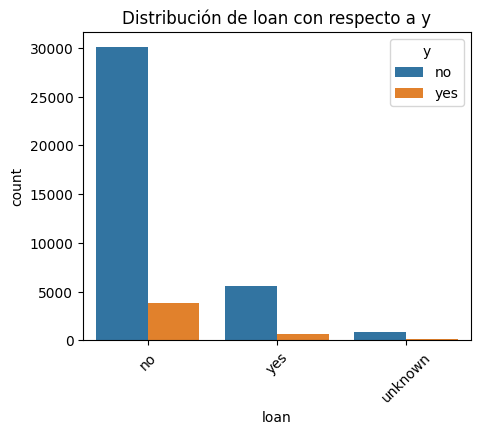

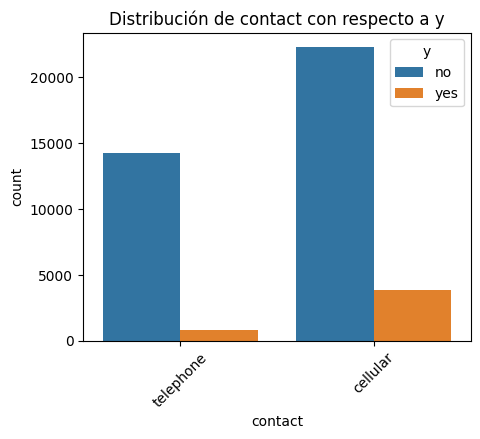

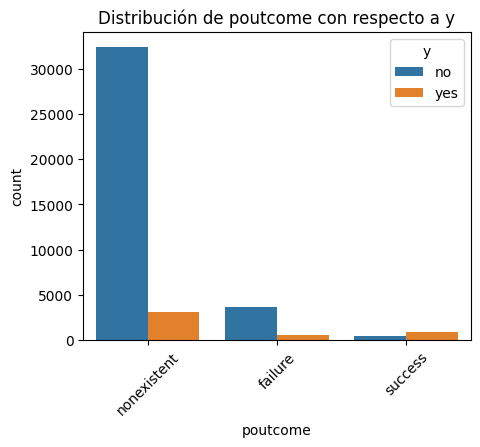

In [246]:
# Crear gráficos automáticamente
for col in categorical_variables:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=total_data, x=col, hue="y")
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {col} con respecto a y")
    plt.show()


- De estos gráficos podemos concluir que los administrativos, blue-collar y technician son los que más han contratado no obstante también son los que más han sido contactados.
- La mayoría de los contactados son casados y en cuanto a los que contratan el resultado es similar al de los solteros.
- La gente con estudios superiores (universidad y escuela superior)cson los que más contratan.
- La mayoría de los que contratan no tienen crédito.
- Observamos poca diferencia entre los que tienen hipoteca y los que no a la hora de contratar, siendo ligeramente superior la contratación en los que tienen hipoteca.
- La mayoría de los que contratan no tienen ningún crédito personal.
- La mayoría de los que contratan han sido contactado vía móvil.
- De la campaña anterior, de la mayoría no hay datos, y entre los que contrataron y los que no la diferencia es pequeña.

#### Análisis numérico-numérico

In [247]:
# Obtener los valores únicos de "y"
unique_y_values = total_data["y"].unique()

# Crear el diccionario de transformación correctamente
y_transformation_rules = {value: idx for idx, value in enumerate(unique_y_values)}

# Guardar el diccionario en un archivo JSON
with open("y_transformation_rules.json", "w") as f:
    json.dump(y_transformation_rules, f)

total_data["y_n"] = total_data["y"].map(y_transformation_rules)

In [248]:
total_data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact  duration  campaign  pdays  previous     poutcome  \
0      telephone       261         1    999         0  nonexistent   
1      telephone       149         1    999         0  nonexistent   
2      telephone       226         1    999         0  nonexistent   
3      telephone       151         1    999         0  nonexistent   
4      telephone       307         1    999         0  nonexistent   
...          ...       ...       ...    ...       ...          ...   
41183   cellular       334         1    999         0  nonexistent   
41184   cellular       383         1    999         0  nonexistent   
41185   cellular       189         2    999         0  nonexistent   
41186   cellular       442         1    999         0  nonexistent   
41187   cellular       239         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1          93.994          -36.4      4.857       5191.0   
1               1.1          93.994          -36.4      4.857       5191.0   
2               1.1          93.994          -36.4      4.857       5191.0   
3               1.1          93.994          -36.4      4.857       5191.0   
4               1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
41183          -1.1          94.767          -50.8      1.028       4963.6   
41184          -1.1          94.767          -50.8      1.028       4963.6   
41185          -1.1          94.767          -50.8      1.028       4963.6   
41186          -1.1          94.767          -50.8      1.028       4963.6   
41187          -1.1          94.767          -50.8      1.028       4963.6   

         y  y_n  
0       no    0  
1       no    0  
2       no    0  
3       no    0  
4       no    0  
...    ...  ...  
41183  yes    1  
41184   no    0  
41185   no    0  
41186  yes    1  
41187   no    0  

[41176 rows x 20 columns]

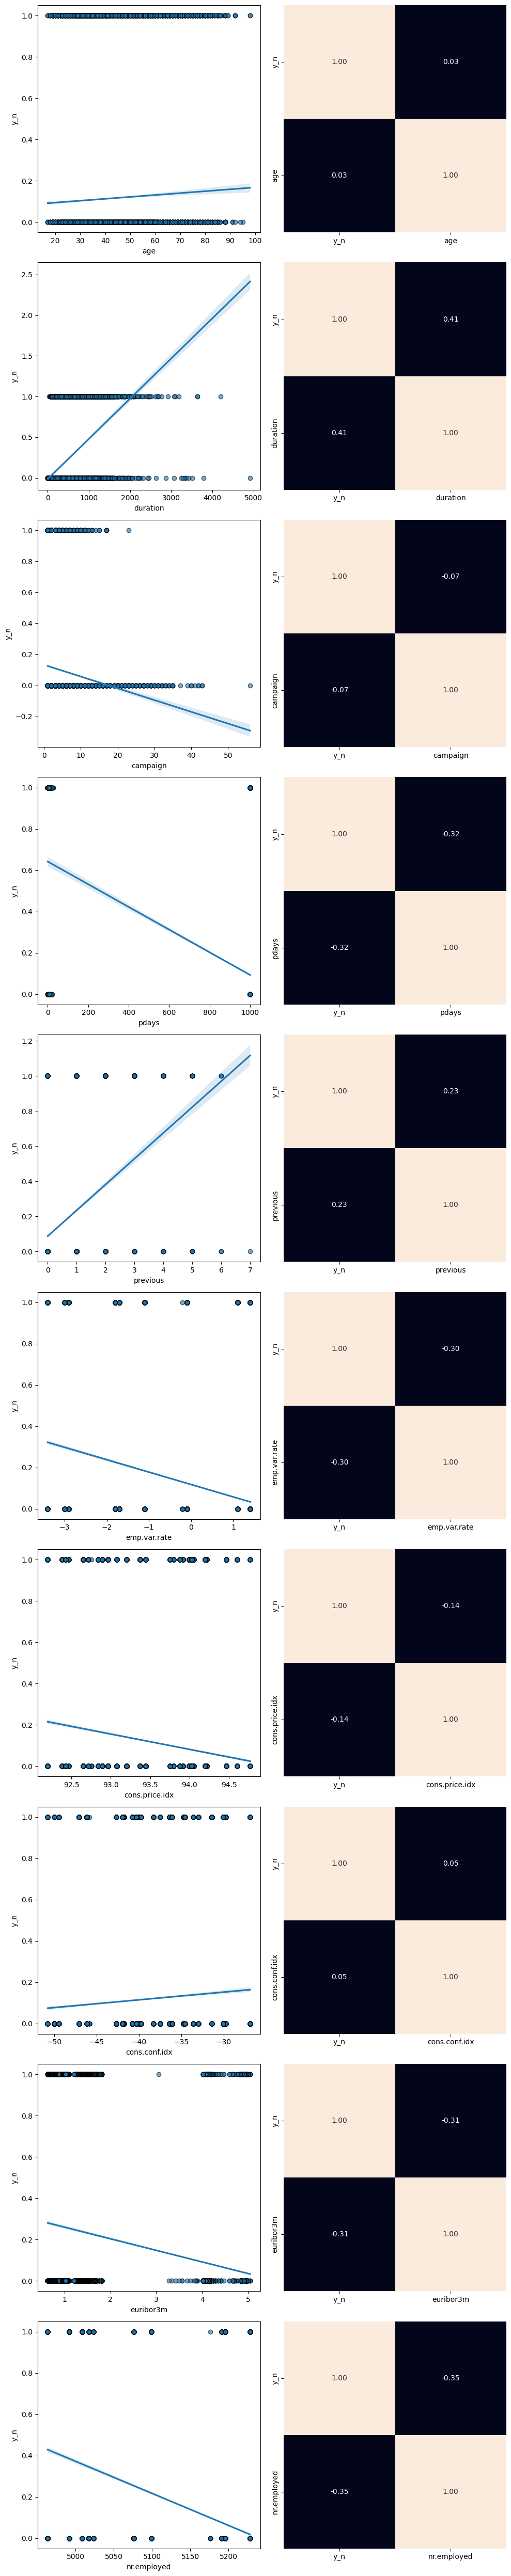

In [249]:
# Crear la variable objetivo
target = total_data["y_n"]

# Crear la figura y los ejes
num_rows = len(numericals_variables)
fig, axis = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Crear gráficos para cada variable
for i, var in enumerate(numericals_variables):
    sns.regplot(ax=axis[i, 0], data=total_data, x=var, y=target, scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
    sns.heatmap(total_data[[target.name, var]].corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [250]:
print(categorical_variables)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']


In [251]:
print(numericals_variables)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']



##### Combinaciones de la clase con varias predictoras

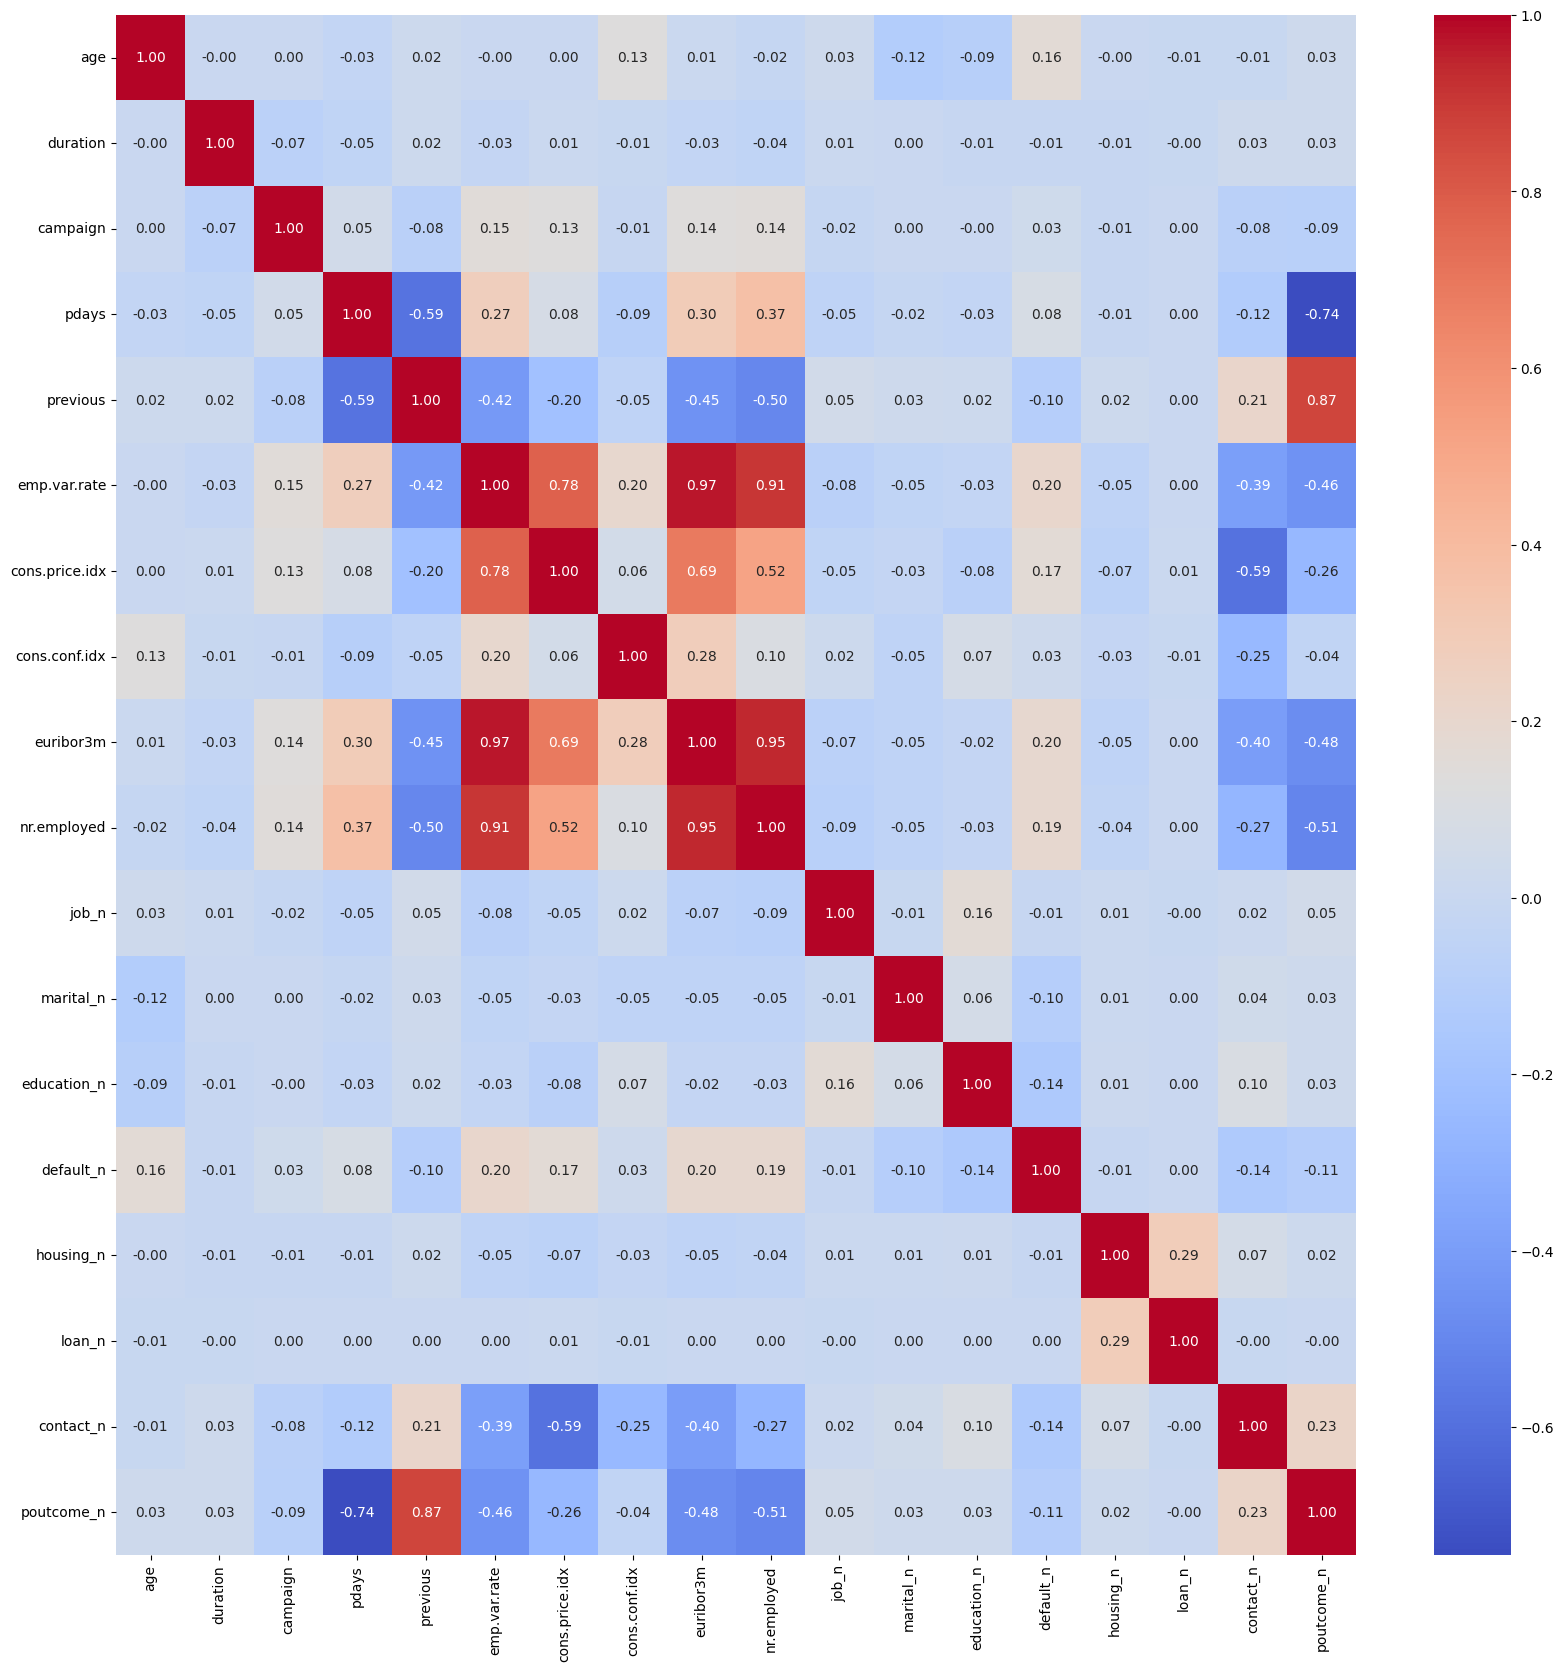

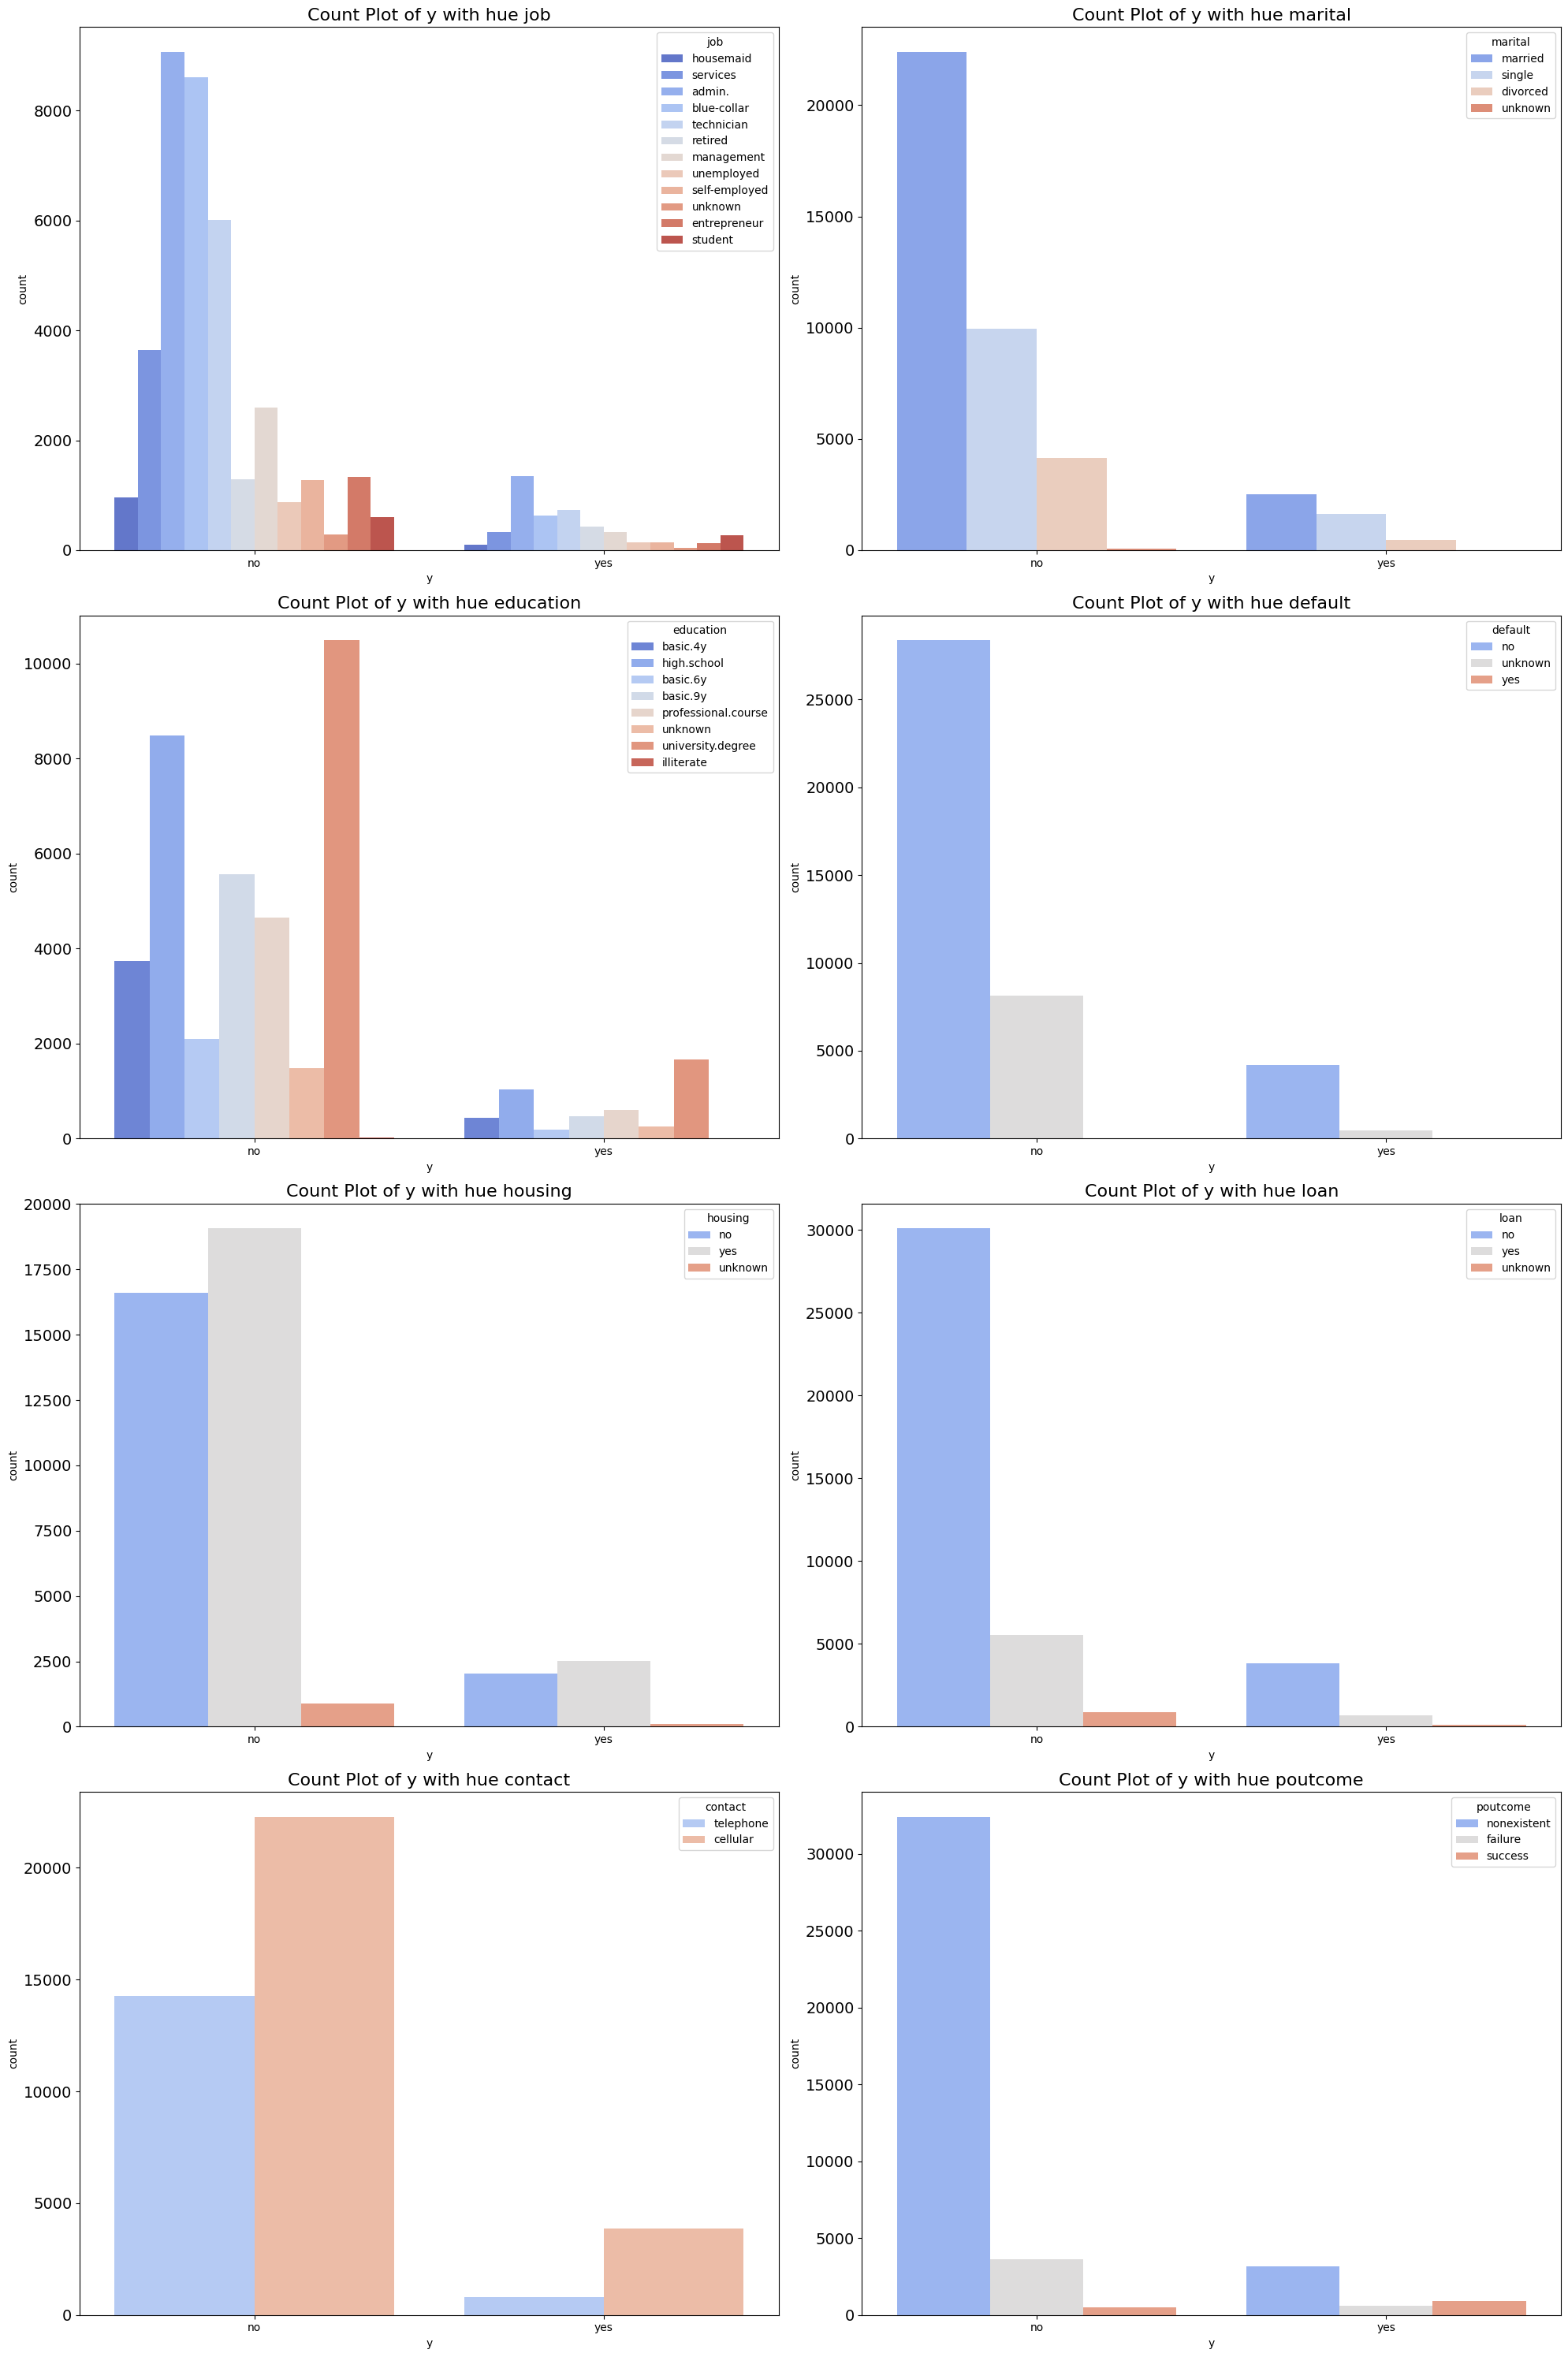

In [252]:
#factorizamos las categóricas
total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]

total_numerical_variables = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n', 'contact_n', 'poutcome_n']

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(total_data[total_numerical_variables].corr(), annot=True, fmt='.2f', cmap="coolwarm")

# Gráficos de barras más grandes
plt.figure(figsize=(20, 30))  # Aumenta la altura para gráficos más grandes

num_cols = 2  # Número de columnas en el grid
num_rows = -(-len(categorical_variables) // num_cols)  # Calcula filas con techo de división

for i, col in enumerate(categorical_variables, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=total_data, x="y", hue=col, palette="coolwarm")
    plt.title(f"Count Plot of y with hue {col}", fontsize=16)
    #plt.xticks(fontsize=14, rotation=45)  # Aumenta tamaño y gira etiquetas
    plt.yticks(fontsize=14)

plt.tight_layout()  # Ajusta el layout para evitar superposiciones
plt.show()


### ANÁLISIS DE CORRELACIÓN

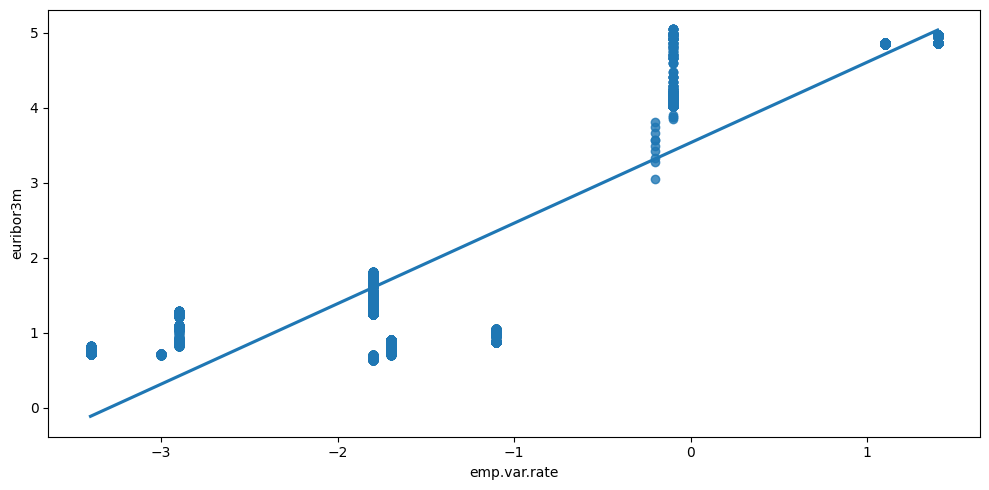

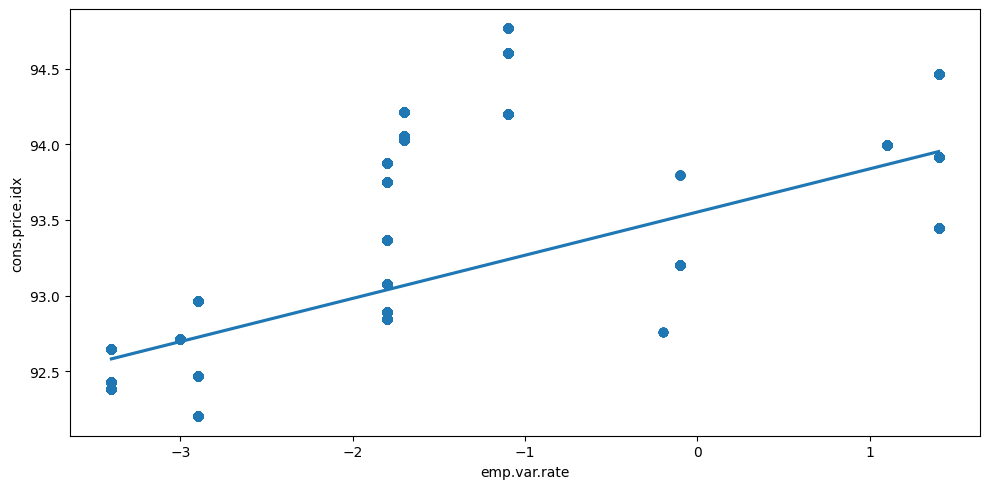

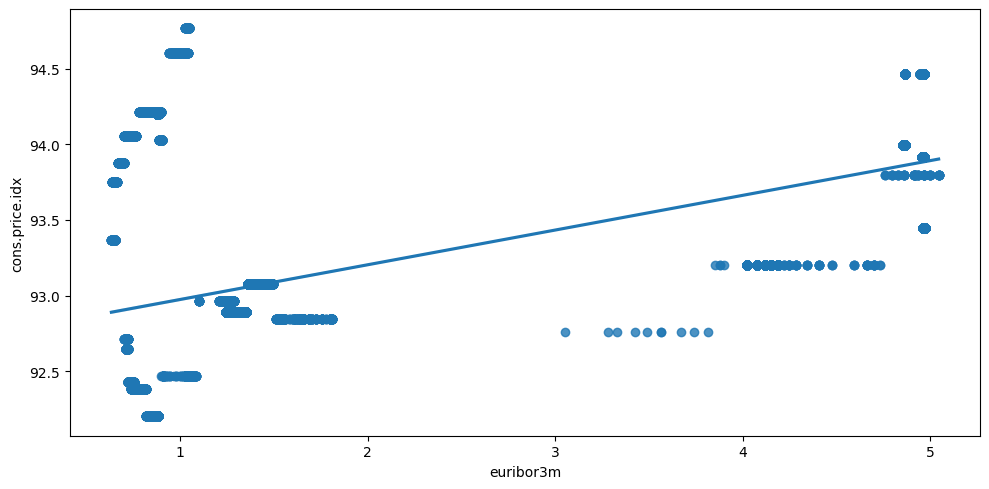

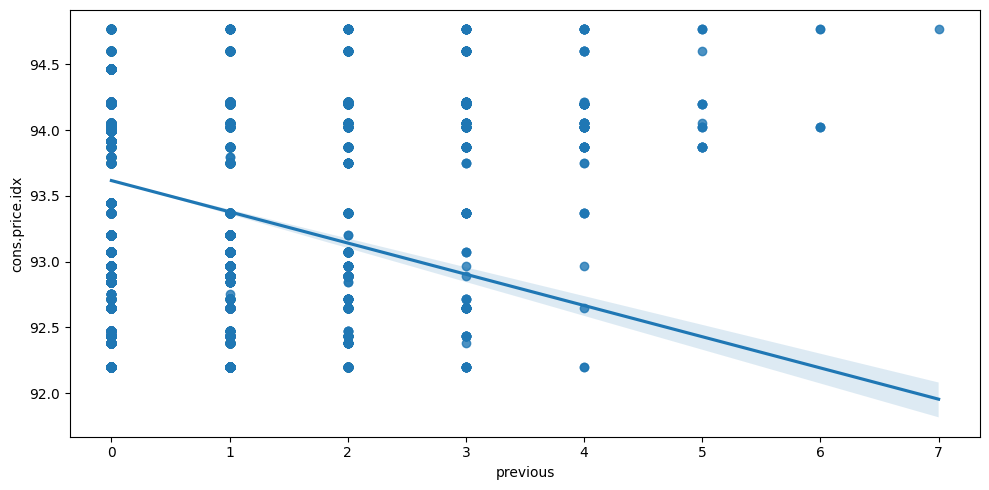

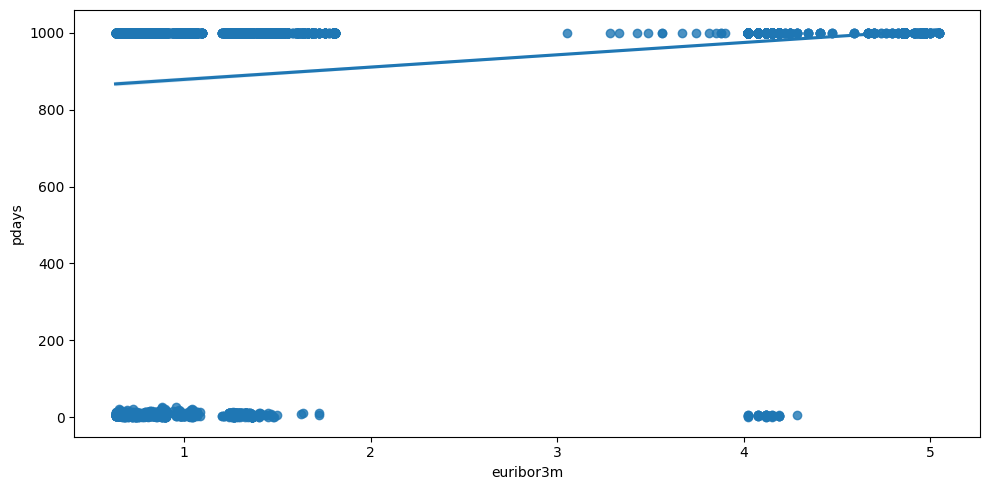

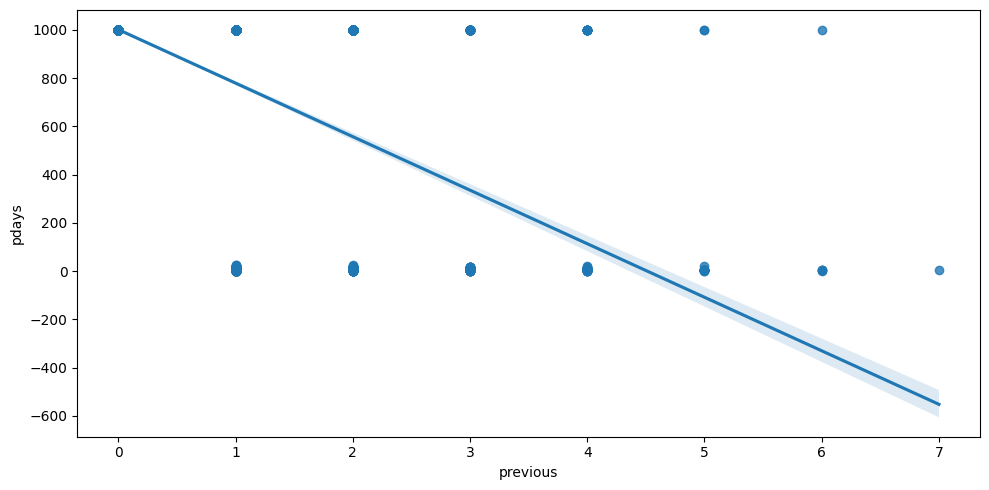

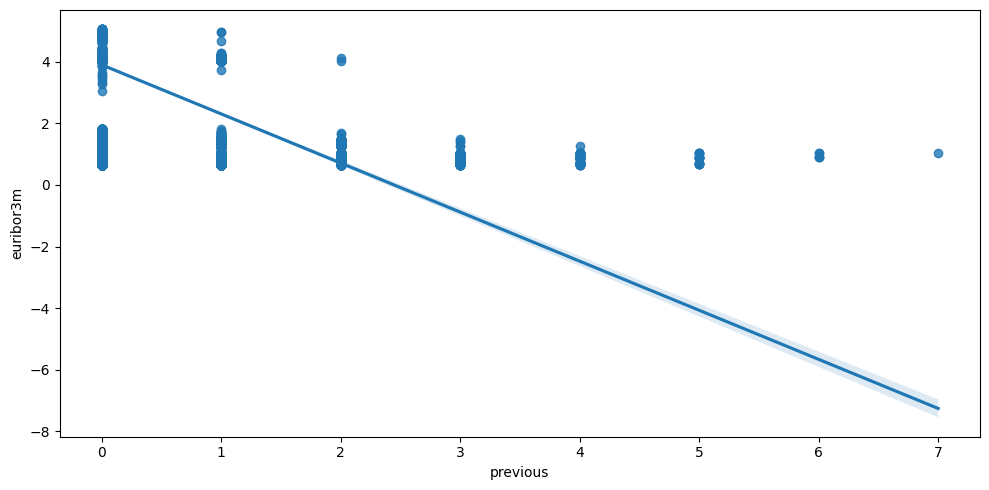

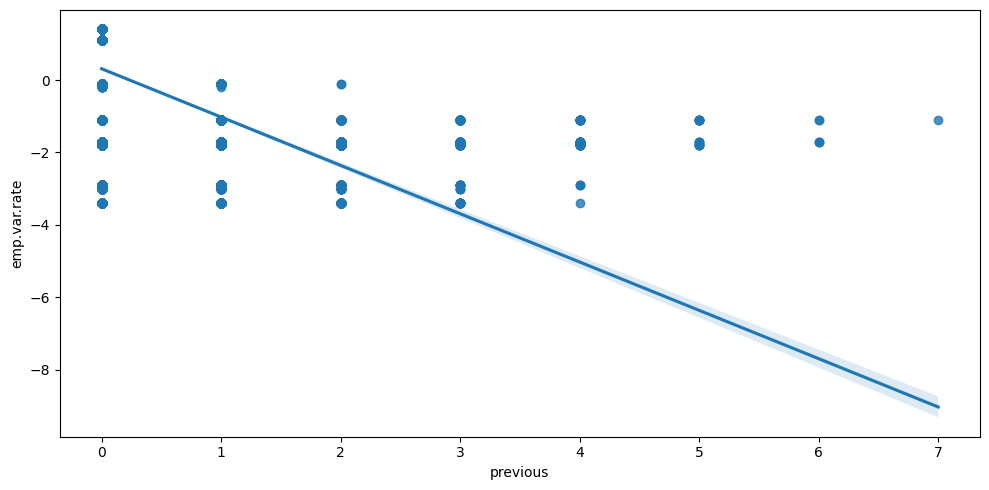

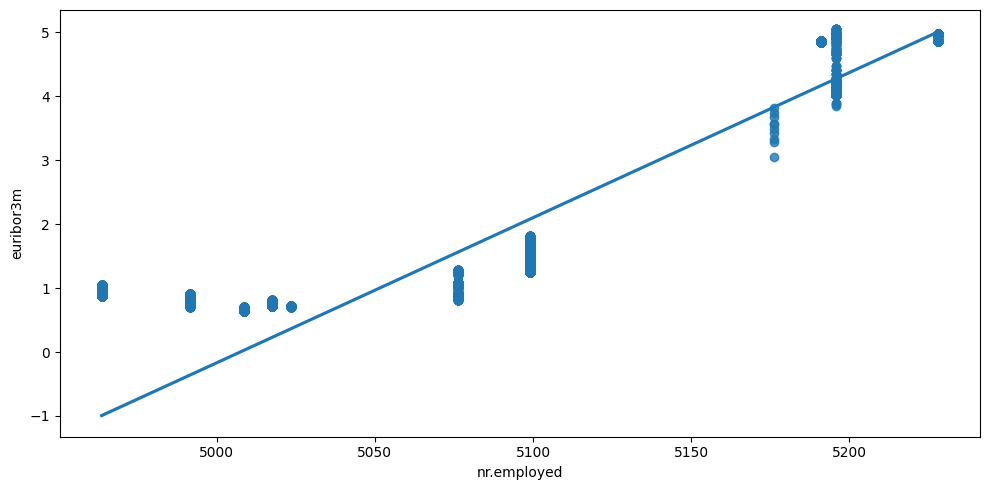

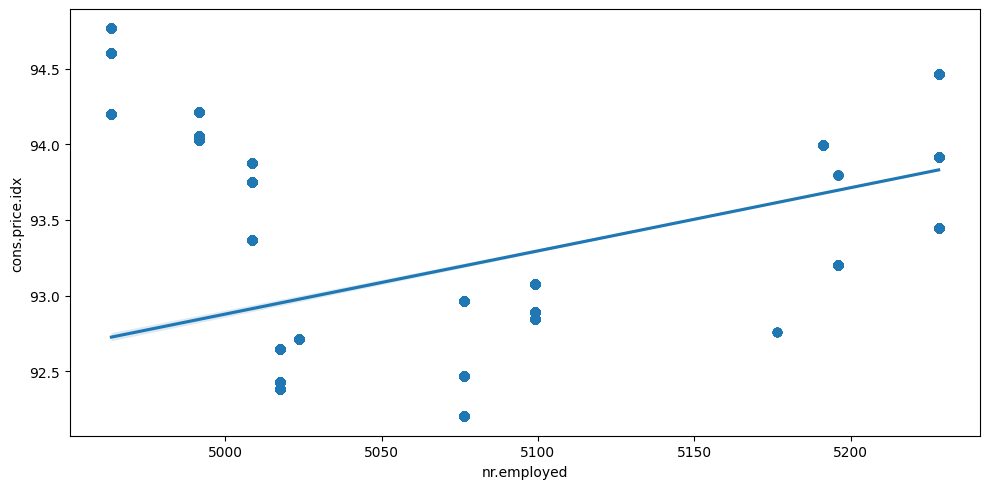

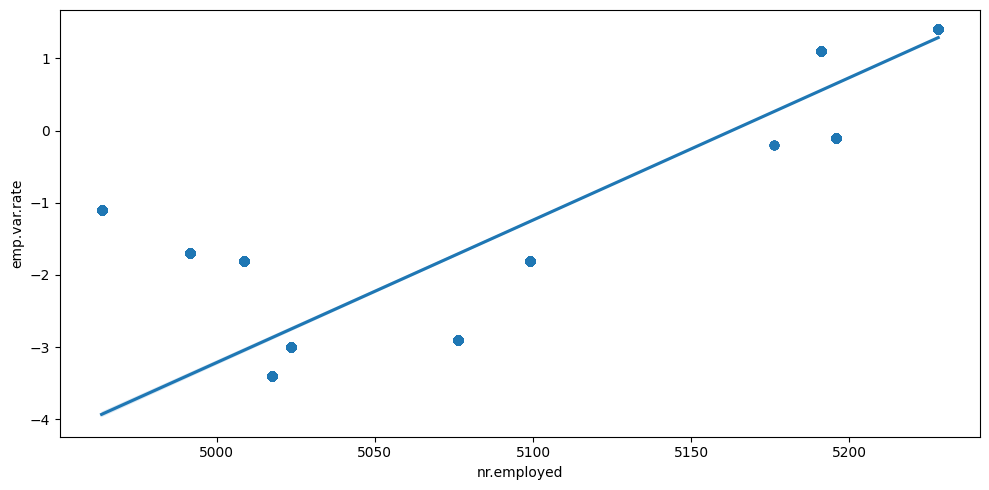

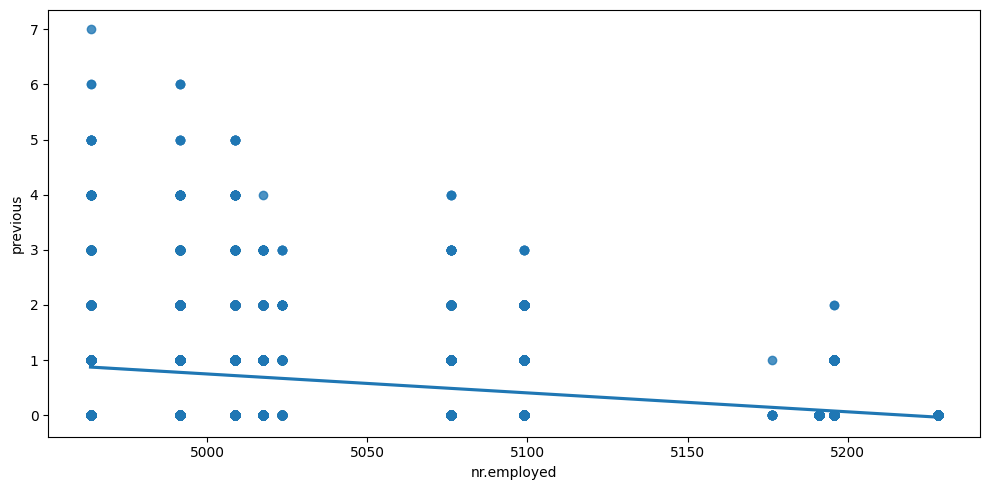

In [253]:
#gráfico 1
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "emp.var.rate", y = "euribor3m")

plt.tight_layout()

plt.show()

#gráfico 2
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "emp.var.rate", y = "cons.price.idx")

plt.tight_layout()

plt.show()

#gráfico 3
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "euribor3m", y = "cons.price.idx")

plt.tight_layout()

plt.show()

#gráfico 4
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "previous", y = "cons.price.idx")

plt.tight_layout()

plt.show()

#gráfico 5
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = total_data, x = "euribor3m", y = "pdays")

plt.tight_layout()

plt.show()

#gráfico 6
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = total_data, x = "previous", y = "pdays")

plt.tight_layout()

plt.show()

#gráfico 7
fig, axis = plt.subplots(figsize = (10, 5))
sns.regplot(data = total_data, x = "previous", y = "euribor3m")

plt.tight_layout()

plt.show()

#gráfico 8
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "previous", y = "emp.var.rate")

plt.tight_layout()

plt.show()

#gráfico 9
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "nr.employed", y = "euribor3m")

plt.tight_layout()

plt.show()

#gráfico 9
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "nr.employed", y = "euribor3m")

plt.tight_layout()

plt.show()

#gráfico 10
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "nr.employed", y = "cons.price.idx")

plt.tight_layout()

plt.show()

#gráfico 11
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "nr.employed", y = "emp.var.rate")

plt.tight_layout()

plt.show()

#gráfico 12
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "nr.employed", y = "previous")

plt.tight_layout()

plt.show()

#gráfico 13
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "nr.employed", y = "pdays")

plt.tight_layout()

plt.show()

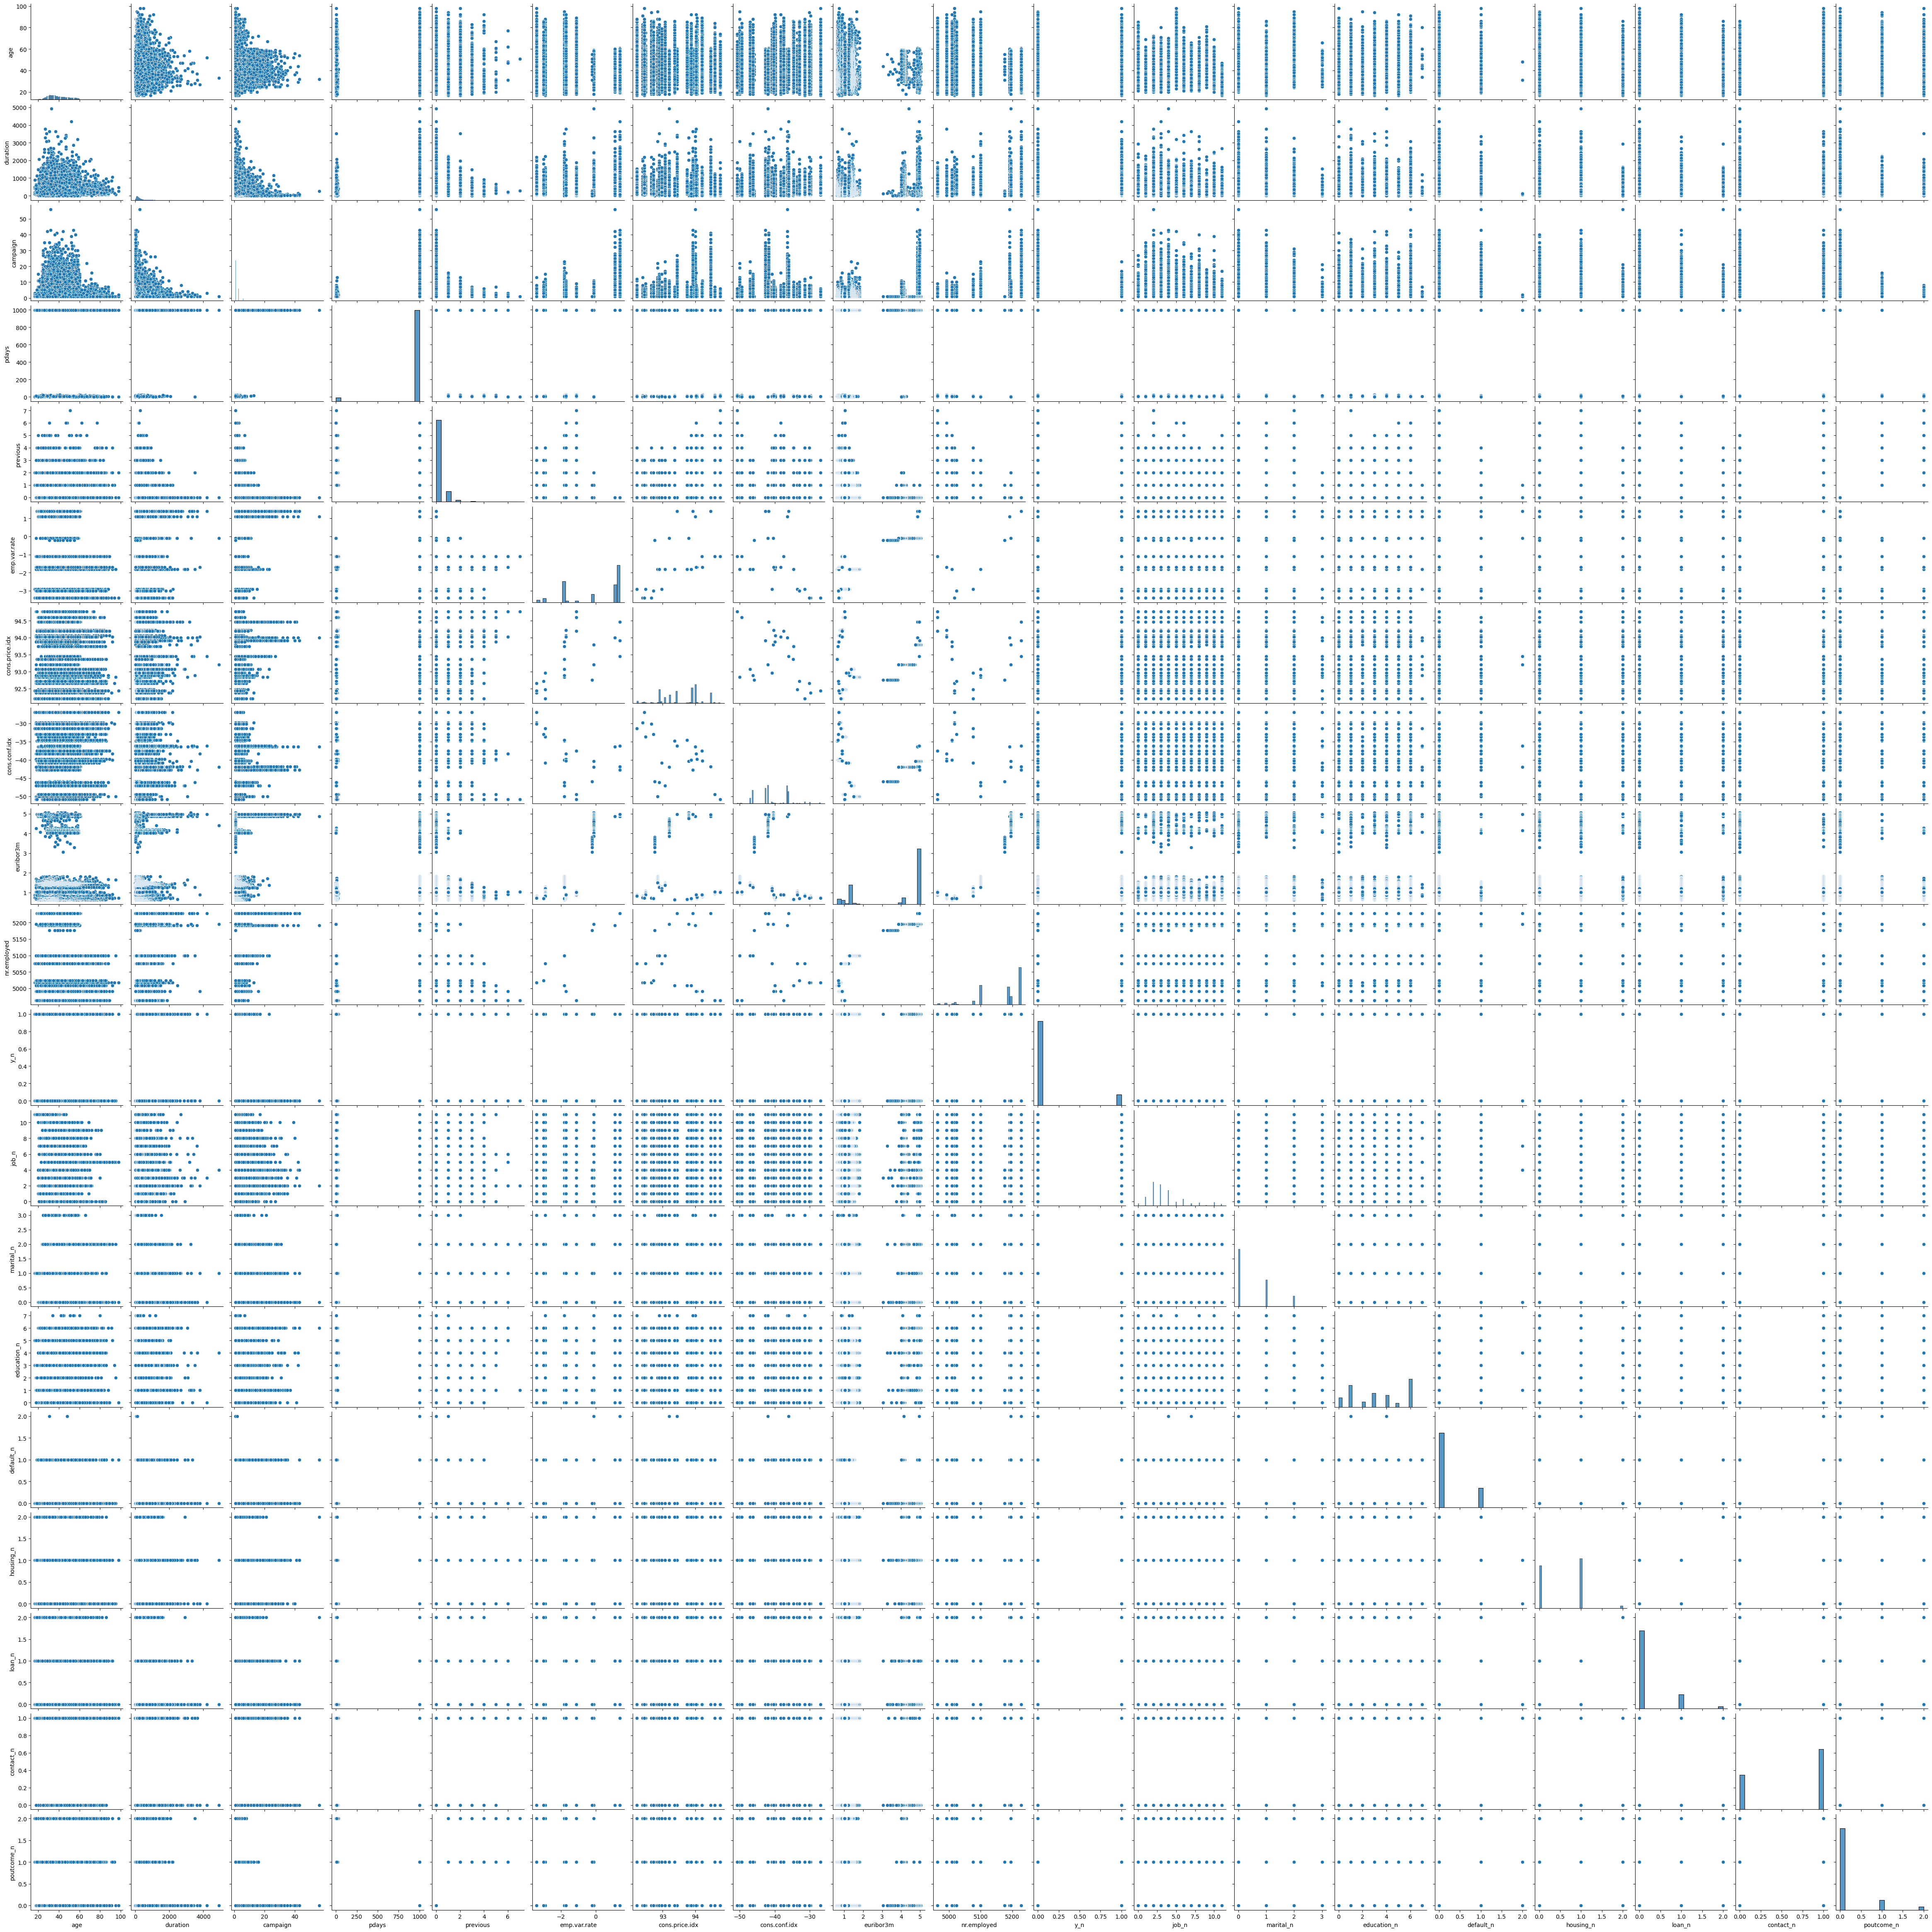

In [254]:
sns.pairplot(data = total_data)

### Paso 5: Ingeniería de características

In [255]:
total_data.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41176.000000    41176.000000   41176.000000  41176.000000   
mean       0.081922       93.575720     -40.502863      3.621293   
std        1.570883        0.578839       4.627860      1.734437   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed           y_n         job_n     marital_n   education_n  \
count  41176.000000  41176.000000  41176.000000  41176.000000  41176.000000   
mean    5167.034870      0.112663      3.673863      0.510637      3.277370   
std       72.251364      0.316184      2.454340      0.696794      2.185558   
min     4963.600000      0.000000      0.000000      0.000000      0.000000   
25%     5099.100000      0.000000      2.000000      0.000000      1.000000   
50%     5191.000000      0.000000      3.000000      0.000000      3.000000   
75%     5228.100000      0.000000      4.000000      1.000000      6.000000   
max     5228.100000      1.000000     11.000000      3.000000      7.000000   

          default_n     housing_n        loan_n     contact_n    poutcome_n  
count  41176.000000  41176.000000  41176.000000  41176.000000  41176.000000  
mean       0.208908      0.571959      0.199825      0.634714      0.169953  
std        0.406713      0.541216      0.456055      0.481516      0.455811  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      1.000000      0.000000      1.000000      0.000000  
75%        0.000000      1.000000      0.000000      1.000000      0.000000  
max        2.000000      2.000000      2.000000      1.000000      2.000000

In [256]:
total_data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact  duration  campaign  ...    y  y_n job_n  marital_n  \
0      telephone       261         1  ...   no    0     0          0   
1      telephone       149         1  ...   no    0     1          0   
2      telephone       226         1  ...   no    0     1          0   
3      telephone       151         1  ...   no    0     2          0   
4      telephone       307         1  ...   no    0     1          0   
...          ...       ...       ...  ...  ...  ...   ...        ...   
41183   cellular       334         1  ...  yes    1     5          0   
41184   cellular       383         1  ...   no    0     3          0   
41185   cellular       189         2  ...   no    0     5          0   
41186   cellular       442         1  ...  yes    1     4          0   
41187   cellular       239         3  ...   no    0     5          0   

       education_n  default_n  housing_n  loan_n contact_n  poutcome_n  
0                0          0          0       0         0           0  
1                1          1          0       0         0           0  
2                1          0          1       0         0           0  
3                2          0          0       0         0           0  
4                1          0          0       1         0           0  
...            ...        ...        ...     ...       ...         ...  
41183            4          0          1       0         1           0  
41184            4          0          0       0         1           0  
41185            6          0          1       0         1           0  
41186            4          0          0       0         1           0  
41187            4          0          1       0         1           1  

[41176 rows x 28 columns]

In [257]:
# Obtener las columnas numéricas del DataFrame
columns = total_data.select_dtypes(include=['number']).columns.tolist()

# Crear la figura y los ejes
num_rows = (len(columns) + 2) // 3  # Calcular el número de filas necesarias

#indicar número de columnas que deseas
num_cols = 3

fig, axis = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))

# Recorrer las columnas y asignarlas a los ejes
for i, col in enumerate(columns):
    row = i // num_cols  # Calcula la fila
    col_index = i % num_cols  # Calcula el índice de la columna
    sns.boxplot(ax=axis[row, col_index], data=total_data, y=col)

# Eliminar ejes vacíos si los hay
for j in range(len(columns), num_rows * num_cols):
    fig.delaxes(axis.flatten()[j])  # Elimina los ejes vacíos

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [263]:
import json
variables_outliers = ["age", "duration", "campaign", "pdays", "previous", "cons.conf.idx", "y_n", "job_n", "marital_n", "loan_n", "poutcome_n"]
total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in variables_outliers:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
outliers_dict

{'age': [np.float64(9.5), np.float64(69.5)],
 'duration': [0, np.float64(644.5)],
 'campaign': [1, np.float64(6.0)],
 'pdays': [np.float64(999.0), np.float64(999.0)],
 'previous': [np.float64(0.0), np.float64(0.0)],
 'cons.conf.idx': [-50.8, np.float64(-26.949999999999992)],
 'y_n': [np.float64(0.0), np.float64(0.0)],
 'job_n': [0, np.float64(7.0)],
 'marital_n': [0, np.float64(2.5)],
 'loan_n': [np.float64(0.0), np.float64(0.0)],
 'poutcome_n': [np.float64(0.0), np.float64(0.0)]}

#### Análisis de valores faltantes

In [264]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
contact_n         0
loan_n            0
housing_n         0
default_n         0
education_n       0
marital_n         0
job_n             0
y_n               0
y                 0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
duration          0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
poutcome_n        0
dtype: int64

In [260]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

age               0
job               0
contact_n         0
loan_n            0
housing_n         0
default_n         0
education_n       0
marital_n         0
job_n             0
y_n               0
y                 0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
duration          0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
poutcome_n        0
dtype: int64

In [268]:
total_data_con_outliers["Credit"] = total_data_con_outliers["loan_n"] + total_data_con_outliers["housing_n"]
total_data_sin_outliers["Credit"] = total_data_sin_outliers["loan_n"] + total_data_sin_outliers["housing_n"]

total_data_con_outliers.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   duration  campaign  ...  y_n  job_n marital_n  education_n  default_n  \
0       261         1  ...    0      0         0            0          0   
1       149         1  ...    0      1         0            1          1   
2       226         1  ...    0      1         0            1          0   
3       151         1  ...    0      2         0            2          0   
4       307         1  ...    0      1         0            1          0   

   housing_n  loan_n  contact_n poutcome_n  Credit  
0          0       0          0          0       0  
1          0       0          0          0       0  
2          1       0          0          0       1  
3          0       0          0          0       0  
4          0       1          0          0       1  

[5 rows x 29 columns]

#### Escalado de valores

In [276]:
### ELEGIR LAS VARIABLES NUMÉRICAS (NO USAR LA TARGET)
num_variables = ["age", "job_n","marital_n", "default_n", "housing_n", "loan_n", "contact_n", "poutcome_n", "Credit"]

# Si deseas filtrar específicamente algunas columnas, puedes hacerlo aquí.
# Por ejemplo, si quieres excluir algunas columnas específicas:
excluded_columns = ["y_n"]  # Coloca aquí cualquier columna que quieras excluir

# Filtrar las columnas excluidas
num_variables = [col for col in num_variables if col not in excluded_columns]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("y_n", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("y_n", axis = 1)[num_variables]
y = total_data_con_outliers["y_n"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_sin_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/y_train.xlsx", index = False)
y_test.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/y_test.xlsx", index = False)

X_train_con_outliers.head()

age  job_n  marital_n  default_n  housing_n  loan_n  contact_n  \
12348   29     10          0          0          1       1          0   
8565    50      2          1          0          0       0          0   
21424   29      2          1          0          0       0          1   
3316    35      2          1          0          0       0          0   
33246   40      3          1          1          0       0          1   

       poutcome_n  Credit  
12348           0       2  
8565            0       0  
21424           0       0  
3316            0       0  
33246           0       0

##### Normalización

In [281]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_test_sin_outliers_norm.xlsx", index = False)


##### Escalado Mínimo-Máximo

In [282]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - regresion lineal/regresion-lineal-machine-learning-python-template/models/excels/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

age     job_n  marital_n  default_n  housing_n  loan_n  contact_n  \
12348  0.148148  0.909091   0.000000        0.0        0.5     0.5        0.0   
8565   0.407407  0.181818   0.333333        0.0        0.0     0.0        0.0   
21424  0.148148  0.181818   0.333333        0.0        0.0     0.0        1.0   
3316   0.222222  0.181818   0.333333        0.0        0.0     0.0        0.0   
33246  0.283951  0.272727   0.333333        0.5        0.0     0.0        1.0   

       poutcome_n  Credit  
12348         0.0     0.5  
8565          0.0     0.0  
21424         0.0     0.0  
3316          0.0     0.0  
33246         0.0     0.0

### Paso 6: Selección de características

In [283]:
selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train_con_outliers_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers_scal), columns = X_train_con_outliers_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers_scal), columns = X_test_con_outliers_scal.columns.values[ix])

# GUARDO X_train_sel.columns
import json

with open("feature_selection_k_5.json", "w") as f:
  json.dump(X_train_sel.columns.tolist(), f)

X_train_sel.head()

age     job_n  marital_n  default_n  housing_n  contact_n  poutcome_n
0  0.148148  0.909091   0.000000        0.0        0.5        0.0         0.0
1  0.407407  0.181818   0.333333        0.0        0.0        0.0         0.0
2  0.148148  0.181818   0.333333        0.0        0.0        1.0         0.0
3  0.222222  0.181818   0.333333        0.0        0.0        0.0         0.0
4  0.283951  0.272727   0.333333        0.5        0.0        1.0         0.0